In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import optuna


/home/hamid/miniconda3/envs/rl_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1862, 0.3021],
        [0.6416, 0.8784]]) 



In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7456, 0.2198, 0.7942],
        [0.8180, 0.0675, 0.8117]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [10]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [12]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [14]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [26]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [25]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [24]:
n = np.ones(5)
t = torch.from_numpy(n)

In [28]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [29]:
prediction = model(data) # forward pass

In [30]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [31]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [32]:
optim.step() #gradient descent

In [33]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [34]:
Q = 3*a**3 - b**2

In [35]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [36]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [37]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


In [41]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [42]:
model.fc = nn.Linear(512, 10)

In [47]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [48]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [49]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [50]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0644, -0.0551, -0.0826, -0.0853,  0.0675, -0.0288,  0.0854, -0.0018,
         -0.0791, -0.1059]], grad_fn=<AddmmBackward0>)


In [51]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [53]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6227, grad_fn=<MseLossBackward0>)


In [55]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [ ]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0033, -0.0043, -0.0023,  0.0098, -0.0042, -0.0007])


In [59]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [ ]:
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [63]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


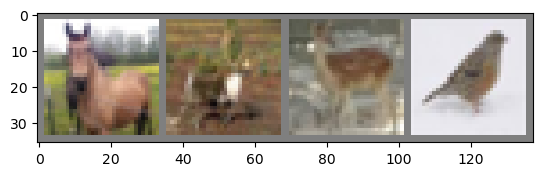

horse deer  deer  bird 


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [72]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.230
[1,  4000] loss: 1.222
[1,  6000] loss: 1.206
[1,  8000] loss: 1.190
[1, 10000] loss: 1.196
[1, 12000] loss: 1.169
[2,  2000] loss: 1.091
[2,  4000] loss: 1.106
[2,  6000] loss: 1.104
[2,  8000] loss: 1.094
[2, 10000] loss: 1.084
[2, 12000] loss: 1.103
Finished Training


In [77]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

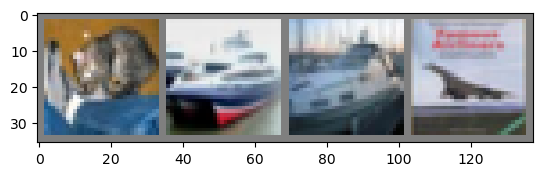

GroundTruth:  cat   ship  ship  plane


In [78]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [79]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [80]:
outputs = net(images)

In [81]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   plane plane plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 69.5 %
Accuracy for class: car   is 67.1 %
Accuracy for class: bird  is 43.7 %
Accuracy for class: cat   is 37.1 %
Accuracy for class: deer  is 60.9 %
Accuracy for class: dog   is 61.1 %
Accuracy for class: frog  is 69.9 %
Accuracy for class: horse is 59.3 %
Accuracy for class: ship  is 66.4 %
Accuracy for class: truck is 75.3 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [85]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [86]:
inputs, labels = data[0].to(device), data[1].to(device)

In [89]:
# Define transformations (Normalize & Convert to Tensors)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  # different class names



Files already downloaded and verified
Files already downloaded and verified


In [96]:
# Defined NN:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)           # Second hidden layer
        self.fc3 = nn.Linear(64, 10)            # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1,32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [95]:
# training:
def train_model(model, optimizer, criterion, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

In [94]:
# testing:
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy


In [ ]:
# Define base model
model1 = Net()

learning_rate = 0.01  # TODO
momentum = 0.9  # TODO

optimizer1 = optim.SGD(model1.parameters(), lr=learning_rate, momentum=momentum)  # SGD optimizer
criterion = nn.CrossEntropyLoss()
train_model(model1, optimizer1, criterion, num_epochs=5)
test_acc1 = test_model(model1)


Epoch 1, Loss: 1.688504037838751
Epoch 2, Loss: 1.484574506050947
Epoch 3, Loss: 1.3989841656584199
Epoch 4, Loss: 1.338362460478101
Epoch 5, Loss: 1.286034372283035
Test Accuracy: 49.97%


In [98]:
learning_rate = 0.1  # TODO
momentum = 0.99  # TODO

optimizer1 = optim.SGD(model1.parameters(), lr=learning_rate, momentum=momentum)  # SGD optimizer
criterion = nn.CrossEntropyLoss()
train_model(model1, optimizer1, criterion, num_epochs=5)
test_acc1 = test_model(model1)

Epoch 1, Loss: 2.3931097870672353
Epoch 2, Loss: 2.380080386452849
Epoch 3, Loss: 2.373817105363442
Epoch 4, Loss: 2.363023406026917
Epoch 5, Loss: 2.369930477685373
Test Accuracy: 10.00%


In [99]:
learning_rate = 0.01  # TODO
momentum = 0.99  # TODO

optimizer1 = optim.SGD(model1.parameters(), lr=learning_rate, momentum=momentum)  # SGD optimizer
criterion = nn.CrossEntropyLoss()
train_model(model1, optimizer1, criterion, num_epochs=5)
test_acc1 = test_model(model1)

Epoch 1, Loss: 2.310710175252464
Epoch 2, Loss: 2.3108798199102654
Epoch 3, Loss: 2.309499024124536
Epoch 4, Loss: 2.3095818472000094
Epoch 5, Loss: 2.3097645781853227
Test Accuracy: 10.00%


In [ ]:
def objective(trial):

    lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)  # 0.00001 and 0.1
    momentum = trial.suggest_uniform("momentum", 0.5, 0.99)  # 0.5 and 0.99

    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    criterion = nn.CrossEntropyLoss()
    train_model(model, optimizer, criterion, num_epochs=3)
    accuracy = test_model(model)
    
    return accuracy 


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-03-03 23:35:46,705] A new study created in memory with name: no-name-67f6975a-56b2-4ebb-ad88-6ecff33f02b4
/home/hamid/miniconda3/envs/rl_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hamid/miniconda3/envs/rl_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  after removing the cwd from sys.path.


Epoch 1, Loss: 1.76361625055739
Epoch 2, Loss: 1.647062079767653
Epoch 3, Loss: 1.5916494040327505


[I 2025-03-03 23:36:01,073] Trial 0 finished with value: 41.21 and parameters: {'lr': 0.029206377151399055, 'momentum': 0.8775327850082157}. Best is trial 0 with value: 41.21.


Test Accuracy: 41.21%
Epoch 1, Loss: 1.8201957793092391
Epoch 2, Loss: 1.5529266255296963
Epoch 3, Loss: 1.4477076596429694


[I 2025-03-03 23:36:15,553] Trial 1 finished with value: 49.29 and parameters: {'lr': 0.006398567211135129, 'momentum': 0.6507319428865175}. Best is trial 1 with value: 49.29.


Test Accuracy: 49.29%
Epoch 1, Loss: 2.1567346889547103
Epoch 2, Loss: 2.126896973077258
Epoch 3, Loss: 2.1315252292026563


[I 2025-03-03 23:36:29,651] Trial 2 finished with value: 18.91 and parameters: {'lr': 0.024186592529075727, 'momentum': 0.9646956378878957}. Best is trial 1 with value: 49.29.


Test Accuracy: 18.91%
Epoch 1, Loss: 2.295370182164266
Epoch 2, Loss: 2.280760195647305
Epoch 3, Loss: 2.2653953984846917


[I 2025-03-03 23:36:44,004] Trial 3 finished with value: 20.37 and parameters: {'lr': 3.0175494283277873e-05, 'momentum': 0.7971305404309106}. Best is trial 1 with value: 49.29.


Test Accuracy: 20.37%
Epoch 1, Loss: 2.2908387685996634
Epoch 2, Loss: 2.2676829940908165
Epoch 3, Loss: 2.2431323124061238


[I 2025-03-03 23:36:58,461] Trial 4 finished with value: 20.98 and parameters: {'lr': 7.428643037861599e-05, 'momentum': 0.7085998223059911}. Best is trial 1 with value: 49.29.


Test Accuracy: 20.98%
Epoch 1, Loss: 2.2995751553899724
Epoch 2, Loss: 2.2787858335466926
Epoch 3, Loss: 2.256946605974028


[I 2025-03-03 23:37:13,115] Trial 5 finished with value: 19.27 and parameters: {'lr': 2.7160899857432926e-05, 'momentum': 0.893988090310951}. Best is trial 1 with value: 49.29.


Test Accuracy: 19.27%
Epoch 1, Loss: 1.8558145293957593
Epoch 2, Loss: 1.5864291392452656
Epoch 3, Loss: 1.4786263183760322


[I 2025-03-03 23:37:27,839] Trial 6 finished with value: 48.78 and parameters: {'lr': 0.0013528867710583268, 'momentum': 0.9073043874531769}. Best is trial 1 with value: 49.29.


Test Accuracy: 48.78%
Epoch 1, Loss: 2.247178530281199
Epoch 2, Loss: 2.107221997173185
Epoch 3, Loss: 1.9990813402662808


[I 2025-03-03 23:37:42,375] Trial 7 finished with value: 31.26 and parameters: {'lr': 0.00022321671194294057, 'momentum': 0.7965189170402983}. Best is trial 1 with value: 49.29.


Test Accuracy: 31.26%
Epoch 1, Loss: 1.8691092613638782
Epoch 2, Loss: 1.5906689437779569
Epoch 3, Loss: 1.4870844208042513


[I 2025-03-03 23:37:57,812] Trial 8 finished with value: 47.84 and parameters: {'lr': 0.00408403838242407, 'momentum': 0.708628956716147}. Best is trial 1 with value: 49.29.


Test Accuracy: 47.84%
Epoch 1, Loss: 2.2683678361291086
Epoch 2, Loss: 2.160001708999019
Epoch 3, Loss: 2.0486608282999588


[I 2025-03-03 23:38:12,647] Trial 9 finished with value: 29.62 and parameters: {'lr': 4.350788494490675e-05, 'momentum': 0.959999303557929}. Best is trial 1 with value: 49.29.


Test Accuracy: 29.62%
Best hyperparameters: {'lr': 0.006398567211135129, 'momentum': 0.6507319428865175}
Best accuracy: 49.29
